In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "color",
    shuffle =True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE

)

Found 54305 files belonging to 38 classes.


In [4]:
classnames = dataset.class_names
classnames

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

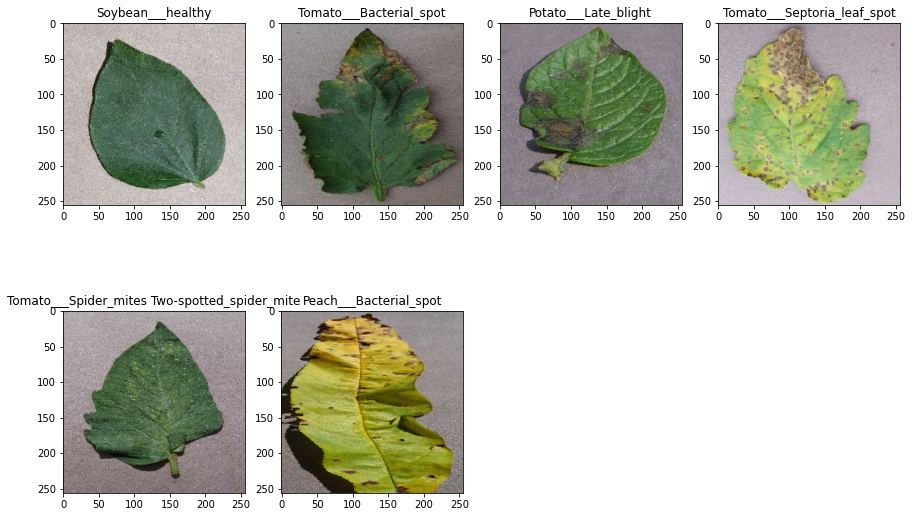

In [5]:
for imbatch, lbatch in dataset.take(1):
    plt.figure(figsize=(15,15))
    for i in range(6):
        plt.subplot(3,4,i+1)
        plt.imshow(imbatch[i].numpy().astype("uint8"))
        plt.title(classnames[lbatch[i]])

In [6]:
def train_test_split(ds, shuffle =True , shuffle_size = 10):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(0.8*len(ds))   
    train_dataset = ds.take(train_size)
    
    validation_size  = int(0.1*len(ds))
    validation_dataset = ds.take(validation_size)
    
    test_dataset = ds.skip(train_size).skip(validation_size)
    
    return train_dataset,validation_dataset, test_dataset
    


In [7]:
train_dataset,validation_dataset, test_dataset = train_test_split(dataset)


In [8]:
len(train_dataset)

1358

In [9]:
# train_dataset = train_dataset.cache().shuffle(5).prefetch(buffer_size = tf.data.AUTOTUNE)
# validation_dataset = validation_dataset.cache().shuffle(5).prefetch(buffer_size = tf.data.AUTOTUNE)
# test_dataset = test_dataset.cache().shuffle(5).prefetch(buffer_size = tf.data.AUTOTUNE)

In [10]:
rescale_and_resize = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [11]:
augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [12]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)

model = models.Sequential([
    rescale_and_resize,
    augmentation,
    layers.Conv2D(32,(3,3), activation = 'relu',input_shape = input_shape ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(38, activation = 'softmax')
])


model.build(input_shape = input_shape )

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [14]:
model.compile(
    optimizer = 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [15]:
model.fit(
    train_dataset,
    epochs = 5,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = validation_dataset
)

Epoch 1/5
1358/1358 [==============================] - 3182s 2s/step - loss: 2.3992 - accuracy: 0.3402 - val_loss: 1.6964 - val_accuracy: 0.5041
Epoch 2/5
1358/1358 [==============================] - 3166s 2s/step - loss: 1.1835 - accuracy: 0.6463 - val_loss: 1.0591 - val_accuracy: 0.6688
Epoch 3/5
1358/1358 [==============================] - 3153s 2s/step - loss: 0.7230 - accuracy: 0.7729 - val_loss: 0.6333 - val_accuracy: 0.8012
Epoch 4/5
1358/1358 [==============================] - 3152s 2s/step - loss: 0.5310 - accuracy: 0.8307 - val_loss: 0.5089 - val_accuracy: 0.8365
Epoch 5/5
1358/1358 [==============================] - 3160s 2s/step - loss: 0.4164 - accuracy: 0.8640 - val_loss: 0.3422 - val_accuracy: 0.8854


In [16]:
model.evaluate(test_dataset)

171/171 [==============================] - 173s 593ms/step - loss: 0.3327 - accuracy: 0.8912


[0.33269113302230835, 0.8911964893341064]

In [20]:
# history.history.keys()

In [ ]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['val_loss']
# val_loss = history.history['val_loss']

In [26]:
# plt.figure(figsize=(8,8))
# plt.subplot(1,2,1)
# plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
# plt.plot(range(EPOCHS), val_acc, label = 'validation Accuracy')
# ply.legend(loc='lower right')
# plt.title('training and Validation Accuracy')

label class of image:  Tomato___Tomato_Yellow_Leaf_Curl_Virus
1/1 [==============================] - 1s 662ms/step
predicted label:  Tomato___Tomato_Yellow_Leaf_Curl_Virus
35
35


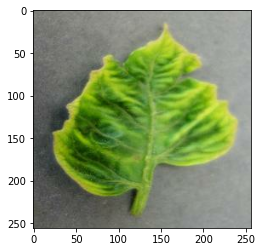

In [35]:
for imbatch, lbatch in test_dataset.take(1):
    image = imbatch[0].numpy().astype('uint8')
    label = lbatch[0].numpy()
    
    plt.imshow(image)
    print("label class of image: ", classnames[label])
    
    predict = model.predict(imbatch)
    print("predicted label: ",classnames[np.argmax(predict[0])])
    print(label)
    print(np.argmax(predict[0]))

In [19]:
model.save("plant_leaf_version_1")

INFO:tensorflow:Assets written to: plant_leaf_version_1/assets


INFO:tensorflow:Assets written to: plant_leaf_version_1/assets


In [30]:
from tensorflow import lite
leaf_model = 'plant_leaf.h5'
keras.models.save_model(model,leaf_model)
converter=lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("plant_leaf.tflite","wb").write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmpwaxr6jhd/assets


INFO:tensorflow:Assets written to: /tmp/tmpwaxr6jhd/assets


750760